In [1]:
from bayes_tec.datapack import DataPack
import numpy as np
import os
import pylab as plt
plt.style.use('ggplot')
%matplotlib inline

datapack = '../../scripts/data/ndppp_datapack.hdf5'
output_folder = "./outputs"
ant_sel = 'RS210HBA'
time_sel = slice(0,2000,1)
dir_sel = slice(0,1,1)
freq_sel = slice(0,1,1)
pol_sel = slice(0,1,1)

def plot_phase_vs_time(datapack,output_folder,
                       ant_sel=None,time_sel=None,dir_sel=None,freq_sel=None,pol_sel=None):

    output_folder = os.path.abspath(output_folder)
    os.makedirs(output_folder,exist_ok=True)

    with DataPack(datapack,readonly=True) as datapack:
        datapack.select(ant=ant_sel,time=time_sel,dir=dir_sel,freq=freq_sel,pol=pol_sel)
        weights,axes = datapack.weights_phase
        freq_ind = len(axes['freq']) >> 1
        freq = axes['freq'][freq_ind]
        ant = axes['ant'][0]
        phase,_ = datapack.phase
        std = 1./np.sqrt(weights)
        timestamps,times = datapack.get_times(axes['time'])
        Npol,Nd,Na,Nf,Nt = phase.shape
        fig,ax = plt.subplots()
        for p in range(Npol):
            for d in range(Nd):
                for a in range(Na):
                    for f in range(Nf):
                        ax.cla()
                        label = "{} {:.1f}MHz {}:{}".format(axes['pol'][p], axes['freq'][f]/1e6, axes['ant'][a], axes['dir'][d])
                        ax.fill_between(times.mjd,phase[p,d,a,f,:]-2*std[p,d,a,f,:],phase[p,d,a,f,:]+2*std[p,d,a,f,:],alpha=0.5,label=r'$\pm2\hat{\sigma}_\phi$')#,color='blue')
                        ax.scatter(times.mjd,phase[p,d,a,f,:],marker='+',alpha=0.3,color='black',label=label)
                        ax.legend()
                        ax.set_xlabel('Time [mjd]')
                        ax.set_ylabel('Phase deviation [rad.]')
                        filename = "{}_{}_{}_{}MHz.png".format(axes['ant'][a], axes['dir'][d], axes['pol'][p], axes['freq'][f]/1e6 )
                        plt.savefig(os.path.join(output_folder,filename))

2018-08-30 15:20:56,299 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/ndppp_datapack.hdf5.
2018-08-30 15:20:56,303 Closing table.
2018-08-30 15:20:56,305 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/ndppp_datapack.hdf5.
2018-08-30 15:20:56,804 Closing table.


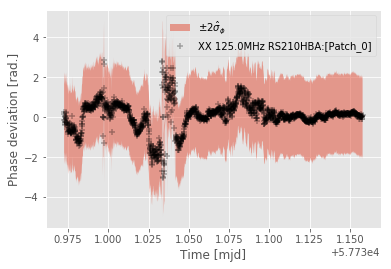

In [2]:
plot_phase_vs_time(datapack = '../../scripts/data/ndppp_datapack.hdf5',
output_folder = "./outputs",
ant_sel = 'RS210HBA',
time_sel = slice(0,2000,1),
dir_sel = slice(0,1,1),
freq_sel = slice(0,1,1),
pol_sel = slice(0,1,1))